In [89]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.tree import plot_tree
from matplotlib import pyplot as plt
from sklearn import tree
from sklearn.tree import export_text
from sklearn.metrics import confusion_matrix
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler

In [2]:
ls

sample_data/


In [158]:
# Importación de dataframe

df = pd.read_csv('/content/sample_data/premierleague.csv')
print(len(df))
df.head()

4070


,clearances_avg_home,corners_avg_home,passes_avg_home,possession_avg_home,shots_avg_home,shots_on_target_avg_home,touches_avg_home,goals_scored_ft_avg_home,goals_conced_ft_avg_home,performance_acum_home
0,38.4,4.6,407.9,48.3,12.9,4.4,619.1,1.44,2.22,37.0
1,29.8,5.6,440.1,52.7,15.3,5.3,659.5,1.35,1.23,48.4
2,29.1,6.1,517.3,57.6,16.5,5.6,726.1,2.33,1.07,68.9
3,32.3,4.0,256.0,35.7,13.0,4.0,442.0,0.67,2.00,0.0
4,38.7,5.0,446.8,51.6,14.2,4.5,669.1,1.08,1.08,38.5


In [159]:
df = df.dropna(how='all')
len(df)

3960

In [133]:
# Función que evalue si hay datos nulos en el dataframe y si los hay los reemplaza por ceros

def check_for_nan(df):
  if df.isnull().values.any():
    return df.fillna(0)

df = check_for_nan(df)

In [160]:
# Normalizar el dataframe

def minmax_norm(df_input):
    return (df - df.min()) / ( df.max() - df.min())

df = minmax_norm(df)
df.head()

,clearances_avg_home,corners_avg_home,passes_avg_home,possession_avg_home,shots_avg_home,shots_on_target_avg_home,touches_avg_home,goals_scored_ft_avg_home,goals_conced_ft_avg_home,performance_acum_home
0,0.640816,0.353846,0.378066,0.457350,0.356,0.427184,0.405244,0.240000,0.370000,0.370
1,0.465306,0.430769,0.433679,0.537205,0.452,0.514563,0.478300,0.225000,0.205000,0.484
2,0.451020,0.469231,0.567012,0.626134,0.500,0.543689,0.598734,0.388333,0.178333,0.689
3,0.516327,0.307692,0.115717,0.228675,0.360,0.388350,0.084991,0.111667,0.333333,0.000
4,0.646939,0.384615,0.445250,0.517241,0.408,0.436893,0.495660,0.180000,0.180000,0.385


In [161]:
# Creación de la variable objetivo transformandola a unaa variable dicotómica

df['performance'] = np.where(df.performance_acum_home >= 0.55, 0, 1)
df = df.drop(columns = ['performance_acum_home'])

In [23]:
df.head()

,clearances_avg_home,corners_avg_home,passes_avg_home,possession_avg_home,shots_avg_home,shots_on_target_avg_home,touches_avg_home,goals_scored_ft_avg_home,goals_conced_ft_avg_home,performance
0,0.640816,0.353846,0.378066,0.457350,0.356,0.427184,0.405244,0.240000,0.370000,1
1,0.465306,0.430769,0.433679,0.537205,0.452,0.514563,0.478300,0.225000,0.205000,1
2,0.451020,0.469231,0.567012,0.626134,0.500,0.543689,0.598734,0.388333,0.178333,0
3,0.516327,0.307692,0.115717,0.228675,0.360,0.388350,0.084991,0.111667,0.333333,1
4,0.646939,0.384615,0.445250,0.517241,0.408,0.436893,0.495660,0.180000,0.180000,1


In [162]:
# Asignación de la variable predictoria(Y) y la variable objetivo (X)

X = df.drop(columns = 'performance')
Y = df.performance

In [163]:
Y.value_counts()

1    2779
0    1181
Name: performance, dtype: int64

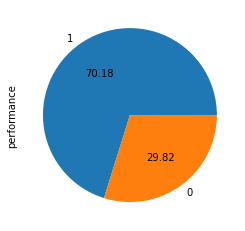

In [164]:
Y.value_counts().plot.pie(autopct = '%.2f')

In [165]:
rus = RandomUnderSampler(sampling_strategy=1)
x_res, y_res = rus.fit_resample(X,Y)


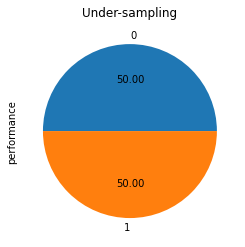

In [166]:
ax = y_res.value_counts().plot.pie(autopct = '%.2f')
_ = ax.set_title("Under-sampling")

In [167]:
y_res.value_counts()

0    1181
1    1181
Name: performance, dtype: int64

In [168]:
X = x_res
Y = y_res

In [ ]:
# over sampling
ros = RandomOverSampler(sampling_strategy=1)
x_res, y_res = ros.fit_resample(X,Y)
ax = y_res.value_counts().plot.pie(autopct = '%.2f')
_ = ax.set_title("Over-sampling")
print(y_res.value_counts())

In [139]:
X.head()

,clearances_avg_home,corners_avg_home,passes_avg_home,possession_avg_home,shots_avg_home,shots_on_target_avg_home,touches_avg_home,goals_scored_ft_avg_home,goals_conced_ft_avg_home
0,0.685714,0.353846,0.531120,0.617647,0.444828,0.427184,0.653059,0.240000,0.370000
1,0.532143,0.430769,0.573047,0.673913,0.527586,0.514563,0.695675,0.225000,0.205000
2,0.519643,0.469231,0.673568,0.736573,0.568966,0.543689,0.765928,0.388333,0.178333
3,0.576786,0.307692,0.333333,0.456522,0.448276,0.388350,0.466245,0.111667,0.333333
4,0.691071,0.384615,0.581771,0.659847,0.489655,0.436893,0.705802,0.180000,0.180000


In [96]:
Y

0       0
1       0
2       0
3       1
4       0
       ..
7777    1
7778    1
7779    1
7780    1
7781    1
Name: performance, Length: 7782, dtype: int64

In [170]:
# Separando la data para la fase de entrenamiento (75%) y fase de prueba (25%)

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size = 0.75, random_state=0)

In [171]:
# Creación del modelo y asignación de los parámetros

model = DecisionTreeClassifier()
arbol = model.fit(X_train, Y_train)

In [172]:
plt.figure(figsize=(150,100))

<Figure size 10800x7200 with 0 Axes>

<Figure size 10800x7200 with 0 Axes>

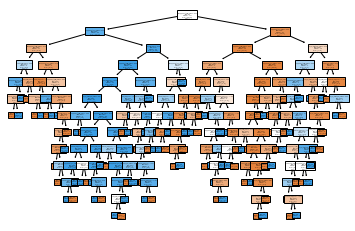

In [173]:
# Visualizar el modelo

tree.plot_tree(arbol, feature_names=list(X.columns.values), class_names=list(str(Y.values)), filled=True)
plt.show()


In [174]:
# Visualizar el modelo en formato texto

texto_modelo = export_text(
                    decision_tree = arbol,
                    feature_names = list(X.columns.values))
               
print(texto_modelo)

|--- goals_scored_ft_avg_home <= 0.25
|   |--- goals_conced_ft_avg_home <= 0.16
|   |   |--- goals_scored_ft_avg_home <= 0.15
|   |   |   |--- corners_avg_home <= 0.49
|   |   |   |   |--- goals_conced_ft_avg_home <= 0.07
|   |   |   |   |   |--- possession_avg_home <= 0.45
|   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |--- possession_avg_home >  0.45
|   |   |   |   |   |   |--- class: 1
|   |   |   |   |--- goals_conced_ft_avg_home >  0.07
|   |   |   |   |   |--- class: 1
|   |   |   |--- corners_avg_home >  0.49
|   |   |   |   |--- corners_avg_home <= 0.60
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- corners_avg_home >  0.60
|   |   |   |   |   |--- class: 1
|   |   |--- goals_scored_ft_avg_home >  0.15
|   |   |   |--- goals_conced_ft_avg_home <= 0.13
|   |   |   |   |--- passes_avg_home <= 0.25
|   |   |   |   |   |--- goals_conced_ft_avg_home <= 0.06
|   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |--- goals_conced_ft_avg_home >  0.06
|   |   |  

In [175]:
# Conjunto de datos predecidos

Y_pred = arbol.predict(X_test)
Y_pred

array([1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1,
       1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1,
       1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1,
       0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0,
       0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0,

In [176]:
# Creando la matriz confusión

mtrix_conf = confusion_matrix(Y_test, Y_pred)
mtrix_conf

array([[255,  40],
       [ 22, 274]])

In [177]:
# Evaluación la precisión del modelo

overall_accuracy = np.sum(mtrix_conf.diagonal())/ np.sum(mtrix_conf)
overall_accuracy

0.8950930626057529

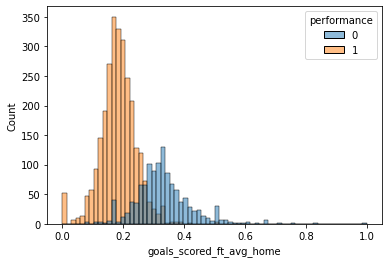

In [178]:
import seaborn as sns
sns.histplot(x = df.goals_scored_ft_avg_home, hue = df.performance)